In [1]:
import pandas as pd
import pickle
from tensorflow.keras.models import load_model

from plot_utils import utils as plot_utils
from models import utils as model_utils

2024-01-10 19:47:28.391695: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-01-10 19:47:28.391716: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-01-10 19:47:28.391729: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-01-10 19:47:28.395316: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-01-10 19:47:28.827618: W tensorflow/compiler/

## Load Data

In [3]:
WINDOW_SIZE = 60
TRAIN = 'train'
TEST = 'test'
# RAW DATA
raw_train_df = pd.read_csv("/home/mdzaja/MasterThesis/artifacts/assets/GC=F/data/raw/train_1m_2024-01-04_2024-01-08.csv", index_col=0)
raw_train_df.index = pd.to_datetime(raw_train_df.index)
raw_train_X = model_utils.get_X(raw_train_df, WINDOW_SIZE)
raw_test_df = pd.read_csv("/home/mdzaja/MasterThesis/artifacts/assets/GC=F/data/raw/test_1m_2024-01-08_2024-01-09.csv", index_col=0)
raw_test_df.index = pd.to_datetime(raw_test_df.index)
raw_test_X = model_utils.get_X(raw_test_df, WINDOW_SIZE)
# FEATURED DATA
feat_train_df = pd.read_csv("/home/mdzaja/MasterThesis/artifacts/assets/GC=F/data/feat/train_1m_2024-01-04_2024-01-08.csv", index_col=0)
feat_train_df.index = pd.to_datetime(feat_train_df.index)
feat_train_X = model_utils.get_X(feat_train_df, WINDOW_SIZE)
feat_test_df = pd.read_csv("/home/mdzaja/MasterThesis/artifacts/assets/GC=F/data/feat/test_1m_2024-01-08_2024-01-09.csv", index_col=0)
feat_test_df.index = pd.to_datetime(feat_test_df.index)
feat_test_X = model_utils.get_X(feat_test_df, WINDOW_SIZE)
# LABELS
with open("/home/mdzaja/MasterThesis/artifacts/assets/GC=F/labels/all_labels_train_1m_2024-01-04_2024-01-08.pkl", 'rb') as file:
    labels_train_dict = pickle.load(file)
Y_train_dict = {}
for label_name in labels_train_dict.keys():
    Y_train_dict[label_name] = model_utils.get_Y(labels_train_dict[label_name], WINDOW_SIZE)
with open("/home/mdzaja/MasterThesis/artifacts/assets/GC=F/labels/all_labels_test_1m_2024-01-08_2024-01-09.pkl", 'rb') as file:
    labels_test_dict = pickle.load(file)
Y_test_dict = {}
for label_name in labels_test_dict.keys():
    Y_test_dict[label_name] = model_utils.get_Y(labels_test_dict[label_name], WINDOW_SIZE)
# WEIGHTS
with open("/home/mdzaja/MasterThesis/artifacts/assets/GC=F/weights/all_weights_train_1m_2024-01-04_2024-01-08.pkl", 'rb') as file:
    weights_train_dict = pickle.load(file)
with open("/home/mdzaja/MasterThesis/artifacts/assets/GC=F/weights/all_weights_test_1m_2024-01-08_2024-01-09.pkl", 'rb') as file:
    weights_test_dict = pickle.load(file)

## Data Presentation

In [4]:
def print_data_info(data_df):
    print(f'\tShape: {data_df.shape}')
    start_date = data_df.index[0].strftime('%Y-%m-%d %H:%M:%S')
    end_date = data_df.index[-1].strftime('%Y-%m-%d %H:%M:%S')
    print(f'\tDates from {start_date} to {end_date}')

print('RAW DATA')
print(f'\tColumns:\n\t{", ".join(raw_train_df.columns.tolist())}')

print('Raw TRAIN data')
print_data_info(raw_train_df)

print(f'Raw TEST data')
print_data_info(raw_test_df)

print('=====================================================================================================')

print('FEATURED DATA')
print(f'\tColumns:\n\t{", ".join(feat_train_df.columns.tolist())}')

print('Featured TRAIN data')
print_data_info(feat_train_df)

print(f'Featured TEST data')
print_data_info(feat_test_df)

RAW DATA
	Columns:
	Open, High, Low, Close, Adj Close, Volume, Returns, Volatility, Max_Drawdown, Max_Drawup, Volume_Change
Raw TRAIN data
	Shape: (1274, 11)
	Dates from 2024-01-04 09:49:00 to 2024-01-08 16:05:00
Raw TEST data
	Shape: (197, 11)
	Dates from 2024-01-08 16:25:00 to 2024-01-09 12:12:00
FEATURED DATA
	Columns:
	Returns, Volatility, Max_Drawdown, Max_Drawup, Volume_Change, ADX, APO, CCI, DX, MFI, RSI, ULTOSC, WILLR, NATR, Alpha, Beta, Index_Returns, Index_Volatility, Correlation, Covariance, Beta_Direct, TF_Max_Drawdown, TF_Max_Drawup, Return_Skewness, Return_Kurtosis, Asset_To_Index_Alpha, Asset_To_Index_Beta, sin_Day_of_Week, cos_Day_of_Week, sin_Day_of_Month, cos_Day_of_Month, sin_Day_of_Year, cos_Day_of_Year, sin_time_of_day, cos_time_of_day
Featured TRAIN data
	Shape: (1274, 35)
	Dates from 2024-01-04 09:49:00 to 2024-01-08 16:05:00
Featured TEST data
	Shape: (197, 35)
	Dates from 2024-01-08 16:25:00 to 2024-01-09 12:12:00


## Label Plots

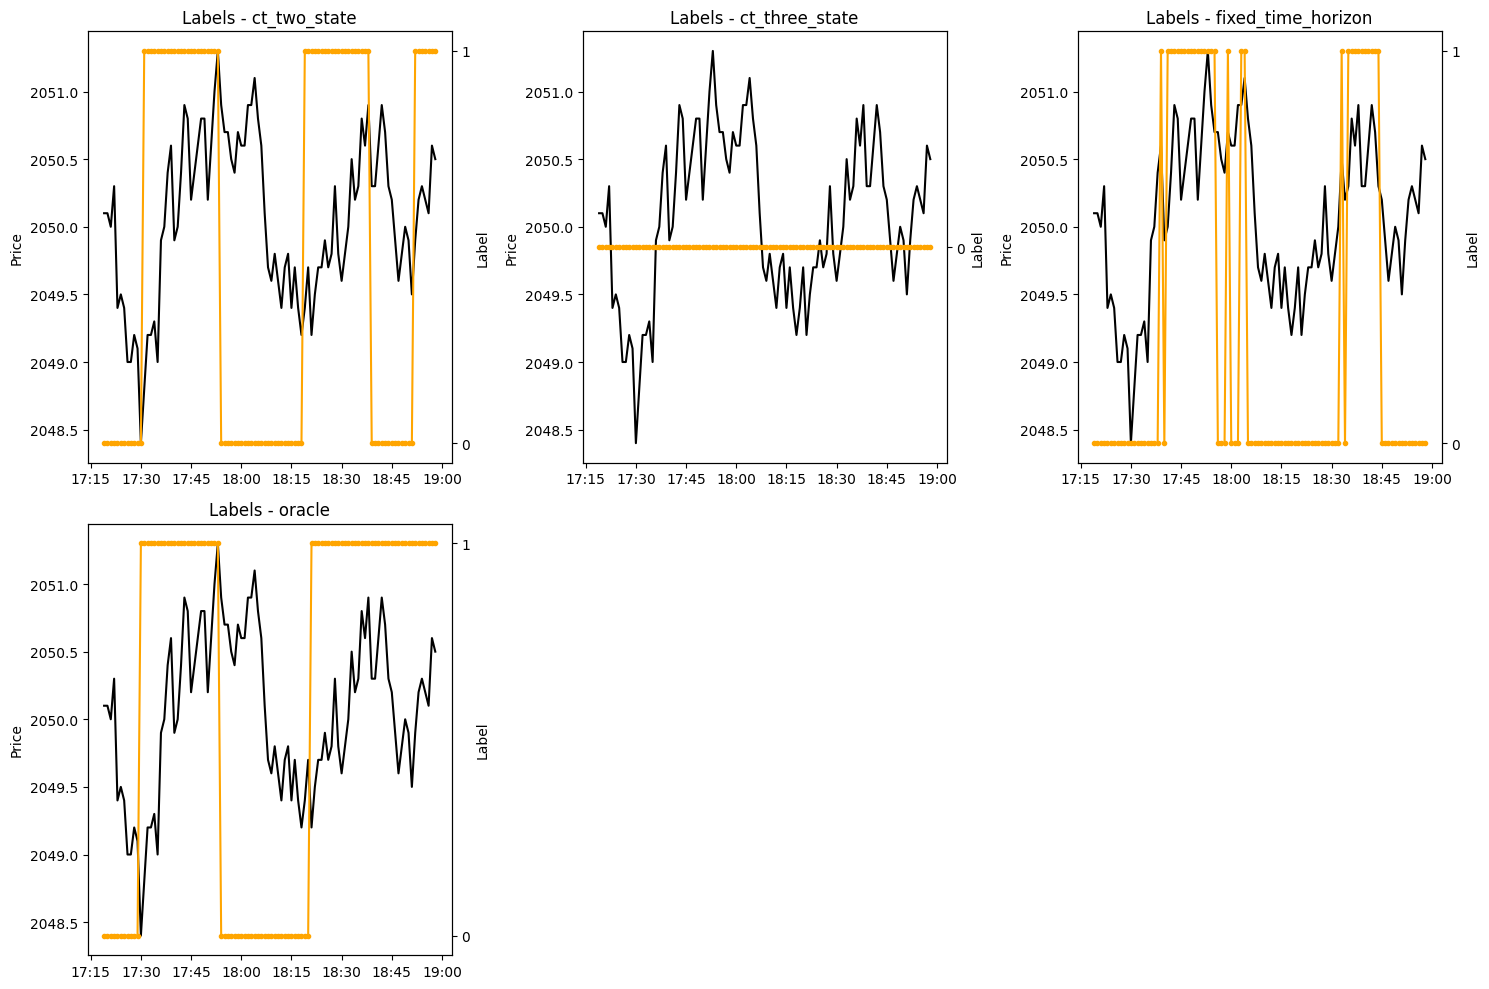

In [5]:
start_index = 150
end_index = 250
prices = raw_train_df['Close'].iloc[start_index:end_index]
labels_dict = {}
for label_name in labels_train_dict.keys():
    labels_dict[label_name] = labels_train_dict[label_name][start_index:end_index]

plot_utils.plot_labels('Labels', prices, labels_dict)

## Weight Plots

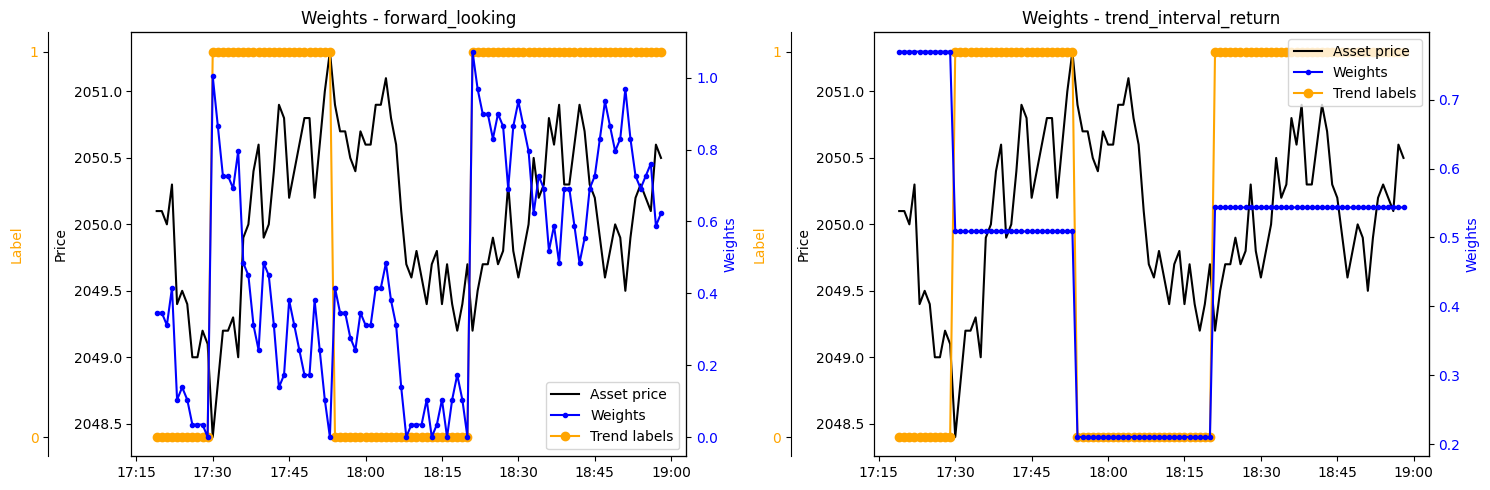

In [6]:
start_index = 150
end_index = 250
prices = raw_train_df['Close'].iloc[start_index:end_index]
labels = labels_train_dict['oracle'].iloc[start_index:end_index]
weights_dict = {}
for weight_alg, weights in weights_train_dict['oracle'].items():
    if weight_alg in ['trend_interval_return', 'forward_looking']:
        weights_dict[weight_alg] = weights.iloc[start_index:end_index]

plot_utils.plot_weights('Weights', prices, labels, weights_dict)

## Accuracy - AUC Plots

## ROC AUC Curve Plots

38/38 [==============================] - 0s 2ms/step


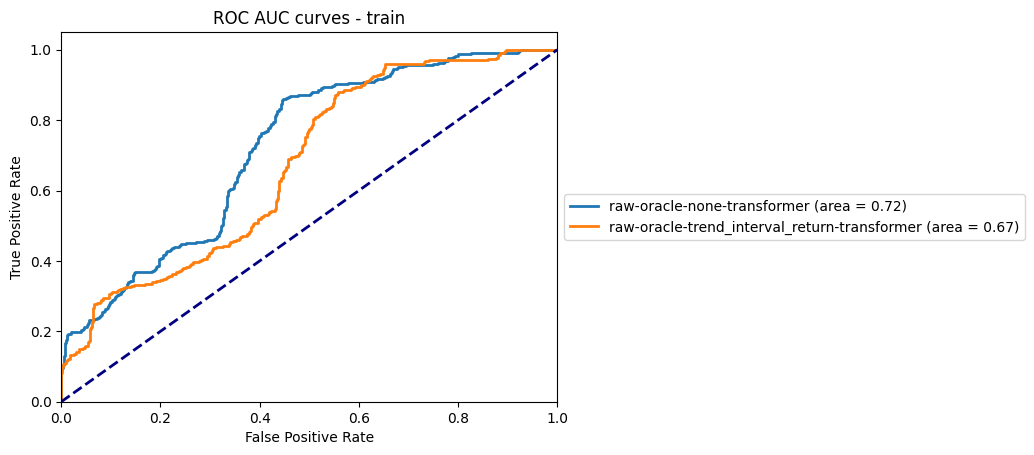

5/5 [==============================] - 0s 2ms/step


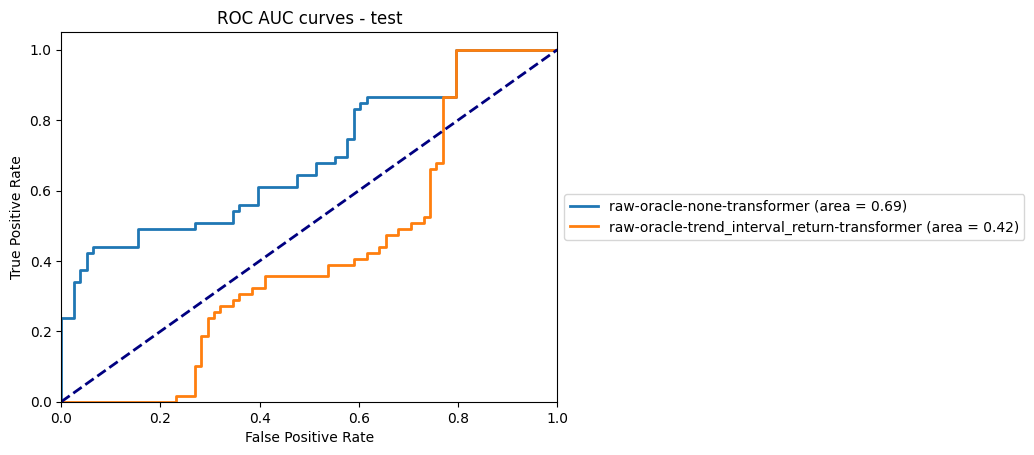

In [9]:
model1 = load_model("/home/mdzaja/MasterThesis/artifacts/models/test_logs/oracle-transformer/saved_models/raw-oracle-none-transformer.keras")
model2 = load_model("/home/mdzaja/MasterThesis/artifacts/models/test_logs/oracle-transformer/saved_models/raw-oracle-trend_interval_return-transformer.keras")

y_prob_dict = {
    'raw-oracle-none-transformer': {
        'label_name': 'oracle',
        'probs': model1.predict(raw_train_X).flatten(),
    },
    'raw-oracle-trend_interval_return-transformer': {
        'label_name': 'oracle',
        'probs': model2.predict(raw_train_X).flatten(),
    }
}
plot_utils.plot_roc_auc_curves(Y_train_dict, y_prob_dict, 'ROC AUC curves - train')

y_prob_dict = {
    'raw-oracle-none-transformer': {
        'label_name': 'oracle',
        'probs': model1.predict(raw_test_X).flatten(),
    },
    'raw-oracle-trend_interval_return-transformer': {
        'label_name': 'oracle',
        'probs': model2.predict(raw_test_X).flatten(),
    }
}
plot_utils.plot_roc_auc_curves(Y_test_dict, y_prob_dict, 'ROC AUC curves - test')




## Backtest Results